In [ ]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [ ]:
import sqlite3
import pandas as pd

db_path = "F:/projects/python_advanced/py-restaurant-data-analysis/db.sqlite3"

query = """
SELECT 
    o.id AS Order_id, 
    o.datetime AS Datetime, 
    oi.quantity AS Quantity, 
    p.name AS Product_name, 
    p.price AS Price
FROM 
    restaurant_orderitem oi 
JOIN 
    restaurant_order o ON oi.order_id = o.id 
JOIN 
    restaurant_product p ON oi.product_id = p.id
"""

try:
    with sqlite3.connect(db_path) as conn:
        combined_df = pd.read_sql_query(query, conn)
        
    combined_df.to_csv("F:/projects/python_advanced/py-restaurant-data-analysis/restaurant_combined.csv", index=False)
    
    print(combined_df.head())

except sqlite3.Error as e:
    print("An error occurred while accessing the database:", e)


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

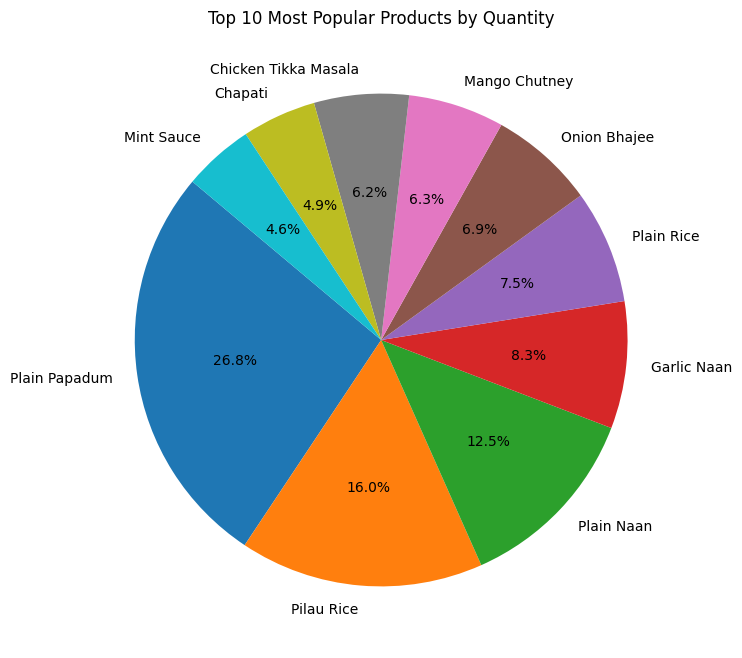

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../restaurant_combined.csv")

top_products = df.groupby("Product_name")["Quantity"].sum().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_products, labels=top_products.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Most Popular Products by Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

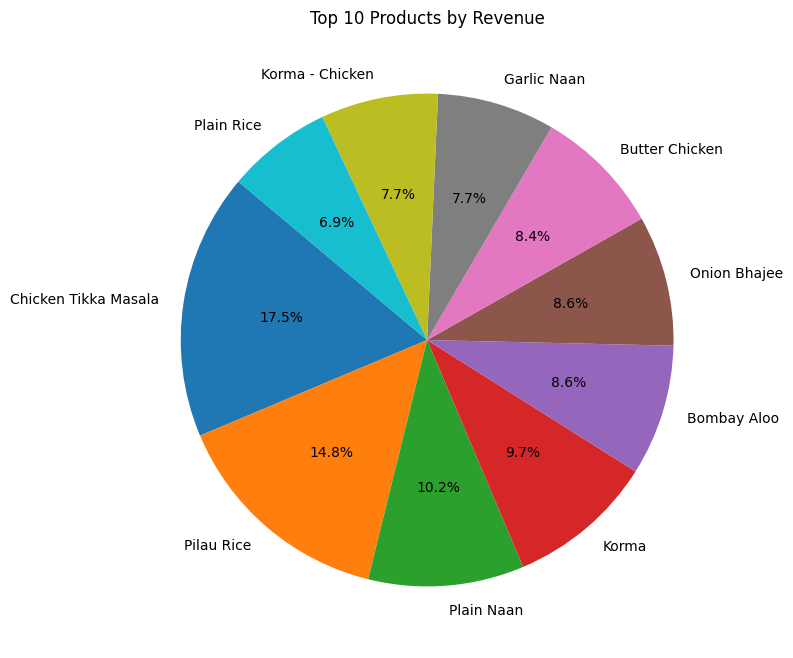

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../restaurant_combined.csv")

df["Item Price"] = df["Price"] * df["Quantity"]

top_products_by_revenue = df.groupby("Product_name")["Item Price"].sum().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_products_by_revenue, labels=top_products_by_revenue.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Products by Revenue")
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

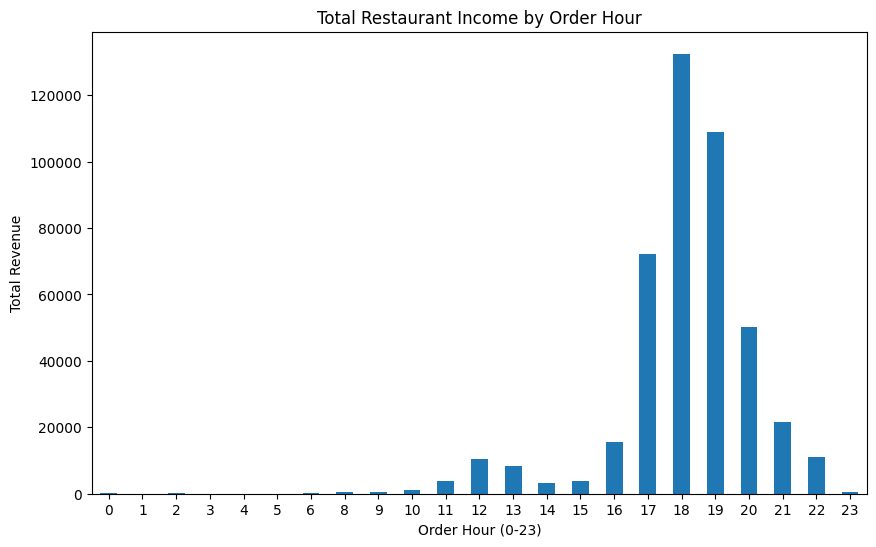

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../restaurant_combined.csv")

df["Datetime"] = pd.to_datetime(df["Datetime"])

df["Order Hour"] = df["Datetime"].dt.hour

df["Item Price"] = df["Price"] * df["Quantity"]

hourly_revenue = df.groupby("Order Hour")["Item Price"].sum()

plt.figure(figsize=(10, 6))
hourly_revenue.plot(kind="bar")
plt.xlabel("Order Hour (0-23)")
plt.ylabel("Total Revenue")
plt.title("Total Restaurant Income by Order Hour")
plt.xticks(rotation=0)

plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

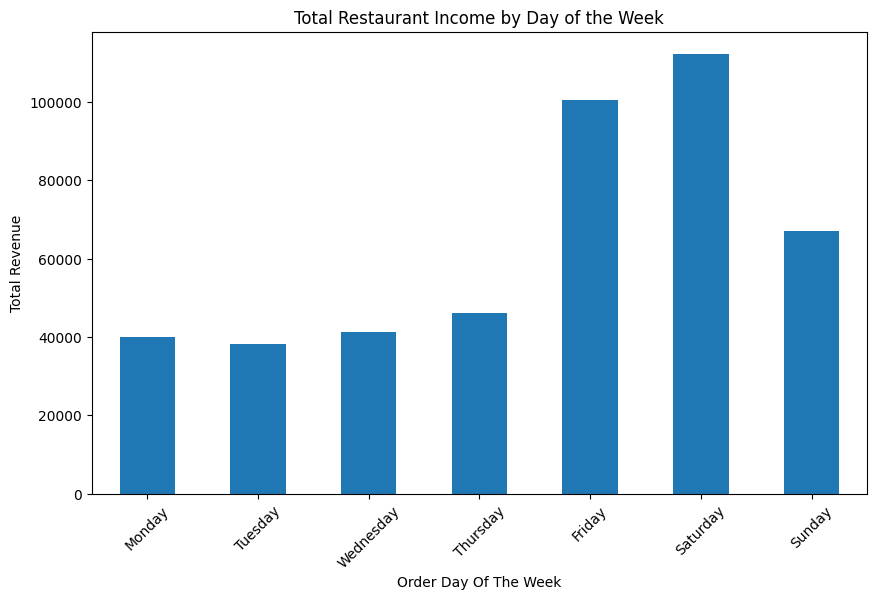

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../restaurant_combined.csv")

df["Datetime"] = pd.to_datetime(df["Datetime"])

df["Order Day Of The Week"] = df["Datetime"].dt.day_name()

df["Item Price"] = df["Price"] * df["Quantity"]

weekly_revenue = df.groupby("Order Day Of The Week")["Item Price"].sum()

weekly_revenue = weekly_revenue.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(10, 6))
weekly_revenue.plot(kind="bar")
plt.xlabel("Order Day Of The Week")
plt.ylabel("Total Revenue")
plt.title("Total Restaurant Income by Day of the Week")
plt.xticks(rotation=45)

plt.show()
